In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt             
import cv2
import tensorflow as tf    
from tqdm import tqdm
from sklearn.utils import shuffle 
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [2]:
class_names = ['Bab chellah Rabat', 'Bab Lahdim Meknes', 'Hassan Rabat', 'Hassan2 Mosque', 'koutoubia Marrakech', 'Menara Marrakech','Palais Royal de Fes', 'Tannerie Chouara']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
print(nb_classes)
IMAGE_SIZE = (224, 224)
print(class_names_label['Bab chellah Rabat'])

8
0


In [3]:
data_dir = 'dataset' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image dataset\train\.ipynb_checkpoints
Issue with image dataset\train\Bab Chellah Rabat
Issue with image dataset\train\Bab Lahdim Meknes
Issue with image dataset\train\Hassan Rabat
Issue with image dataset\train\Hassan2 Mosque
Issue with image dataset\train\koutoubia Marrakech
Issue with image dataset\train\Menara Marrakech
Issue with image dataset\train\Palais Royal de Fes
Issue with image dataset\train\Tannerie Chouara
Issue with image dataset\valid\.ipynb_checkpoints
Issue with image dataset\valid\Bab Chellah Rabat
Issue with image dataset\valid\Bab Lahdim Meknes
Issue with image dataset\valid\Hassan Rabat
Issue with image dataset\valid\Hassan2 Mosque
Issue with image dataset\valid\koutoubia Marrakech
Issue with image dataset\valid\Menara Marrakech
Issue with image dataset\valid\Palais Royal de Fes
Issue with image dataset\valid\Tannerie Chouara


In [5]:
def load_data():

    datasets = ['dataset/train', 'dataset/valid']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        c=0
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = c
            c+=1
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading dataset/train


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 441/441 [00:04<00:00, 89.39it/s]


Loading dataset/valid


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 91.77it/s]


In [7]:
len(train_images)

1727

In [8]:
train_labels=train_labels.reshape(len(train_images),1)
test_labels=test_labels.reshape(len(test_images),1)

In [9]:
test_labels.shape

(197, 1)

In [10]:
test_images.shape

(197, 224, 224, 3)

In [11]:
label=to_categorical(train_labels)
label.shape

(1727, 9)

In [12]:
label_t=to_categorical(test_labels)
label_t.shape

(197, 9)

In [13]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [14]:
train_images.shape[1:]

(224, 224, 3)

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(1024, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [18]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping
early_stopping_monitor=EarlyStopping(patience=5)
hist=model.fit(train_images,label,epochs=80,callbacks=[early_stopping_monitor],validation_data=(test_images,label_t))

Epoch 1/80
54/54 [==============================] - 226s 4s/step - loss: 2.0101 - accuracy: 0.2432 - val_loss: 2.1520 - val_accuracy: 0.2183
Epoch 2/80
54/54 [==============================] - 234s 4s/step - loss: 1.9422 - accuracy: 0.2640 - val_loss: 2.1171 - val_accuracy: 0.2183
Epoch 3/80
54/54 [==============================] - 206s 4s/step - loss: 1.8332 - accuracy: 0.3092 - val_loss: 2.0464 - val_accuracy: 0.2538
Epoch 4/80
54/54 [==============================] - 200s 4s/step - loss: 1.6830 - accuracy: 0.3862 - val_loss: 2.0248 - val_accuracy: 0.2893
Epoch 5/80
54/54 [==============================] - 199s 4s/step - loss: 1.5673 - accuracy: 0.4221 - val_loss: 2.1393 - val_accuracy: 0.1421
Epoch 6/80
54/54 [==============================] - 200s 4s/step - loss: 1.5086 - accuracy: 0.4540 - val_loss: 1.9021 - val_accuracy: 0.3604
Epoch 7/80
54/54 [==============================] - 208s 4s/step - loss: 1.4095 - accuracy: 0.4754 - val_loss: 1.8524 - val_accuracy: 0.4112
Epoch 8/80
54

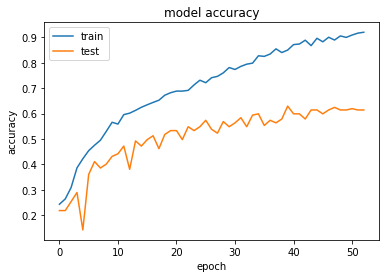

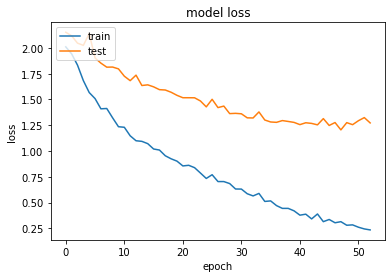

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.savefig('model loss.png')
plt.show()

In [22]:
rev_labels=[]
for i ,k in enumerate(class_names_label.keys()):
    rev_labels.append(k)
rev_labels

['Bab chellah Rabat',
 'Bab Lahdim Meknes',
 'Hassan Rabat',
 'Hassan2 Mosque',
 'koutoubia Marrakech',
 'Menara Marrakech',
 'Palais Royal de Fes',
 'Tannerie Chouara']

In [67]:
image = cv2.imread("6.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
image = image.reshape((1,224,224,3))

In [68]:
predict = model.predict(image)
print(np.argmax(predict))
arr=predict[0]
index = np.where(arr == predict[0].max())

print(index)

7
(array([7], dtype=int64),)


In [69]:
rev_labels[np.argmax(predict)-1]

'Palais Royal de Fes'

In [66]:
model.save('my_final_model.h5')